In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
data_1 = pd.read_parquet("./data/green_tripdata_2021-01.parquet")
data_2 = pd.read_parquet("./data/green_tripdata_2021-02.parquet")

# Features Engineering

In [3]:
data_1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [4]:
# to calculate the duration we need to substact lpep_dropoff_datetime and lpep_pickup_datetime
# because these columns is datetime format then we need pd.to_datetime(column)
data_1['lpep_dropoff_datetime'] = pd.to_datetime(data_1['lpep_dropoff_datetime'])
data_1['lpep_pickup_datetime'] = pd.to_datetime(data_1['lpep_pickup_datetime'])

#save the new duration into dataframe
data_1['duration'] = data_1['lpep_dropoff_datetime'] - data_1['lpep_pickup_datetime']

data_1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,0 days 00:03:56
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,0 days 00:08:45
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,0 days 00:05:58
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,0 days 00:07:05
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0 days 00:00:04


In [5]:
# the duration will be our target for machine learning
# we have first change the value of the duration into minutes 

time_data = data_1['duration'].iloc[0]
time_data.total_seconds() / 60 #from seconds to minutes

3.933333333333333

In [6]:
# apply all the transformations from datetime to minutes to all data in durations
data_1['duration'] = data_1['duration'].apply(lambda time_data: time_data.total_seconds() / 60 )

#look at the duration column
data_1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0.066667


# EDA

In [7]:
# data_1 = data_1[data_1['trip_type']==2]

In [8]:
data_1['duration'].describe(percentiles=[0.95, 0.98, 0.99])
#from this we now that we have very long max values that of course determine date
# and minimum value that just very short trips
# from percentiles we see that most of the data is less than 1 hour

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [9]:
# so from this point of view we can focus on duration that is ;ess than 1 hour
((data_1['duration'] >= 1) & (data_1['duration']<=60)).mean()
# mean is used to see how many data is less than 1 hour

0.9658903787344154

In [10]:
# # already make a function below so do not need to run this
# data_1 = data_1[((data_1['duration'] >= 1) & (data_1['duration']<=60))]
# data_1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


# Preprocessing Data

In [11]:
# define data that we will use for our model
categorical = ["PULocationID", 'DOLocationID']
numerical = ["trip_distance"]
target = 'duration'

# look data type for categorical and numerical variables
data_1[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [12]:
def read_dataframe(data):
    
    data['duration'] = data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']
    
    data['duration'] = data['duration'].apply(lambda time_data: time_data.total_seconds() / 60 )
    
    data = data[((data['duration'] >= 1) & (data['duration']<=60))]
    
    #because the data is int for categorical, we need to change it to string
    data[categorical] = data[categorical].astype(str)

    return data
    

In [13]:
data_train = read_dataframe(data_1)
data_val = read_dataframe(data_2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1504\2095018082.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical] = data[categorical].astype(str)


In [14]:
# Feature engineering
# except using "PULocationID" and "DOLocationID" seperately, we can combine them
data_train['PU_DO'] = data_train['PULocationID'] + "_" + data_train['DOLocationID']
data_val['PU_DO'] = data_val['PULocationID'] + "_" + data_val['DOLocationID']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1504\2425110371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['PU_DO'] = data_val['PULocationID'] + "_" + data_val['DOLocationID']


In [15]:
data_train.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333,43_151
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000,166_239
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667,41_42
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333,168_75
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,...,0.96,0.0,None,0.3,5.76,1.0,1.0,0.00,2.316667,75_75


In [16]:
categorical = ['PU_DO']

In [17]:
# change data to dictionary vector  (one hot encoding)
train_dicts = data_train[categorical + numerical].to_dict(orient="records")
val_dicts = data_val[categorical + numerical].to_dict(orient="records")

In [18]:
dv = DictVectorizer()

In [19]:
# for train data
X_train= dv.fit_transform(train_dicts)
# see the 5 example feature names 
print(dv.feature_names_[0:5])

y_train= data_train[target].values

['PU_DO=100_168', 'PU_DO=100_180', 'PU_DO=100_190', 'PU_DO=100_225', 'PU_DO=100_235']


In [20]:
# for validation data
X_val= dv.transform(val_dicts)
y_val= data_val[target].values

# Train Model

## Linear Regression

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_train)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1504\199399414.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "predictions")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1504\199399414.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label= "actual")


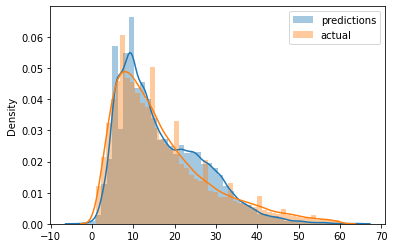

In [23]:
sns.distplot(y_pred, label = "predictions")
sns.distplot(y_train, label= "actual")

plt.legend()
plt.show()

In [24]:
# see MSE of model
mean_squared_error(y_train, y_pred, squared=False)

5.69956411819896

In [25]:
#test on validation
y_pred_val = lr.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared = False)

7.758715208537182

## Lasso Regression

In [26]:
ls = Lasso(alpha=0.01)
ls.fit(X_train, y_train)

Lasso(alpha=0.01)

In [27]:
#predict train
y_pred = ls.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

10.550479040582232

In [28]:
#test on validation
y_pred_val = ls.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared = False)

11.167275941179728

## Ridge Regression

In [29]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [30]:
#predict train
y_pred = ridge.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

10.712682923244788

In [31]:
#test on validation
y_pred_val = ridge.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared = False)

11.342603943250333

# Save model

In [32]:
# based on our three models
# we can see that the best model is linear regression
# therefore we need to save them 

with open('./model/linear_regression.bin', "wb") as file:
    pickle.dump((dv, lr), file)